*Decision Tree & Random Forest* 

We are going to predict once again if a passenger on the Titanic is going to survive or not using decision trees and random forests this time: 

1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

In [94]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
titanic_df=pd.read_csv("titanic-passengers.csv",delimiter=';')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


Preprocessing data

In [96]:
titanic_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [97]:
replaced_value=titanic_df['Age'].mean()
titanic_df['Age'].fillna(value=replaced_value, inplace=True)
titanic_df=titanic_df.drop(['Cabin', 'Embarked'], axis=1)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [98]:
encoder=LabelEncoder()
titanic_df["Survived"]=encoder.fit_transform(titanic_df["Survived"])
titanic_df["Sex"]=encoder.fit_transform(titanic_df["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000


Decision tree:

In [177]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


x=titanic_df[['Sex', 'Age','Fare','SibSp']]
y= titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

decision_tree = tree.DecisionTreeClassifier(random_state=0,max_depth=3, criterion="gini",splitter="best")  
decision_tree =decision_tree.fit(x_train, y_train)   
y_pred=decision_tree.predict(x_test)  
accuracy=accuracy_score(y_test, y_pred)*100

print("Accuracy = {0:.2f}".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 81.56


In [179]:
#plotting decision tree
text_representation = tree.export_text(decision_tree)
print(text_representation)


|--- feature_0 <= 0.50
|   |--- feature_2 <= 48.20
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  2.50
|   |   |   |--- class: 0
|   |--- feature_2 >  48.20
|   |   |--- feature_3 <= 5.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  5.50
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 3.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  2.50
|   |   |   |--- class: 0
|   |--- feature_1 >  3.50
|   |   |--- feature_2 <= 26.27
|   |   |   |--- class: 0
|   |   |--- feature_2 >  26.27
|   |   |   |--- class: 0



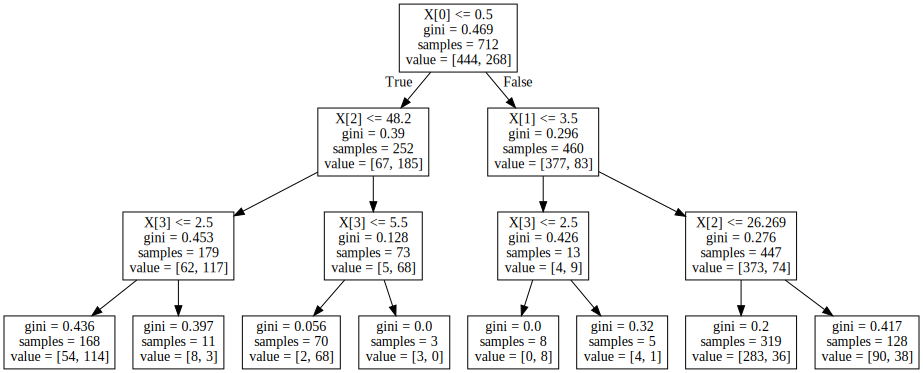

In [180]:
#plotting decision tree
import graphviz
dot_data=tree.export_graphviz(decision_tree , out_file=None)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

Applying decision trees for the second time , changing the decision tree parameters

In [175]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


x=titanic_df[['Sex', 'Age','Fare','SibSp']]
y= titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

decision_tree = tree.DecisionTreeClassifier(random_state=0,max_depth=3, criterion="entropy",splitter="random")  
decision_tree =decision_tree.fit(x_train, y_train)   
y_pred=decision_tree.predict(x_test)   
print("Accuracy = {0:.2f}".format(accuracy_score(y_test, y_pred)*100))

Accuracy = 81.01


Applying random forests with different n_estimators values we can notice that higher values gives higher accuray,
but also it makes it slower

In [173]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
x=titanic_df[['Sex', 'Age','Fare','SibSp']]
y= titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
random_forest=RandomForestClassifier(n_estimators=10)
random_forest=random_forest.fit(x_train, y_train)  
y_pred=random_forest.predict(x_test)  
print("Accuracy = {0:.2f}".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy = 78.77


In [172]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
x=titanic_df[['Sex', 'Age','Fare','SibSp']]
y= titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
random_forest=RandomForestClassifier(n_estimators=80) 
random_forest=random_forest.fit(x_train, y_train)  
y_pred=random_forest.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 82.12290502793296


In [154]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
x=titanic_df[['Sex', 'Age','Fare','SibSp']]
y= titanic_df["Survived"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)
random_forest=RandomForestClassifier(n_estimators=100) 
random_forest=random_forest.fit(x_train, y_train)  
y_pred=random_forest.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)  

Accuracy: 82.68156424581005
